In [2]:
#import and set data
import pandas as pd
import numpy as np
import warnings
from tqdm import tqdm
import stopword_pre
warnings.filterwarnings('ignore')


In [3]:
# DATA_PATH = "../../data/"
# data = pd.read_pickle(f"{DATA_PATH}df_filter_dummy_{TARGET_CITY}.pkl")

#==========get data=========================================
print("DATA LOADING........")
data_all = pd.read_csv("../../data/topic_data.csv")
keyword_list = pd.read_excel("../../data/Text_keyword_0620.xlsx")
keyword_list = list(keyword_list['Target 키워드'])
print("DONE")


DATA LOADING........
DONE


In [4]:

#TARGET_CITY = str(input("Which City You want to draw network?  ex)포항시   :  "))
TARGET_CITY_LIST = [
    [
        '구리시', '안성시', '양주시', '오산시', '의왕시', '이천시', '춘천시', '하남시', '경산시', '아산시', '원주시', '광주시', '의정부시', '양산시', '진주시',
        '김포시', '시흥시', '파주시', '평택시', '제주시', '화성시', '청주시', '남양주시', '전주시', '천안시', '김해시', '고양시', '수원시', '용인시'
    ],
    [
        "계룡시", '동두천시', '광양시', '포천시', '구미시', '거제시', '군포시', '부천시', '성남시', '안산시'
    ],
    [
        '속초시', '과천시', '강릉시', '목포시', '광명시', '포항시', '안양시', '창원시'
    ],
    [
        '동해시', '삼척시', '태백시', '문경시', '상주시', '영주시', '김제시', '남원시', '정읍시', '공주시', '익산시', '여수시', '안동시', '경주시'
    ],
    [
        '사천시', '밀양시', '김천시', '영천시', '논산시', '보령시', '제천시'
    ],
    [
        '여주시','통영시', '나주시', '서귀포시', '당진시', '서산시', '충주시', '순천시', '군산시'
    ]
]


In [5]:
stop_lst = []
for item in TARGET_CITY_LIST:
    for city in item:
        stop_lst.append(city)
        stop_lst.append(city[:-1])

In [6]:
stop_lst.extend(['경북', '경상북도', '경남', '경상남도', '경기','경기도', '전남', '전라남도', '전북', '전라북도', '충남', '충청남도', '충북', '충청북도'])

In [7]:
print("If you don't have NanumGothic in your computer, It will rasie error here")
import matplotlib.font_manager as fm
import matplotlib

font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path, size=18)
font_name = fm.FontProperties(fname="/usr/share/fonts/truetype/nanum/NanumGothic.ttf").get_name()

matplotlib.rcParams['font.family'] ='NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

If you don't have NanumGothic in your computer, It will rasie error here


In [8]:
def is_in_group(x, Group):
    return x in Group

In [9]:
temp_key = data_all['filter_keyword']

Group 1 START
384142
Keyword_set_prepared
itemset_built
# of single keyword set : 374
          lift
0.50  2.916312
0.70  3.573997
0.90  4.668613
0.99  7.346499


100%|██████████| 372/372 [00:00<00:00, 12206.38it/s]

Number of node : 25
Draw Net


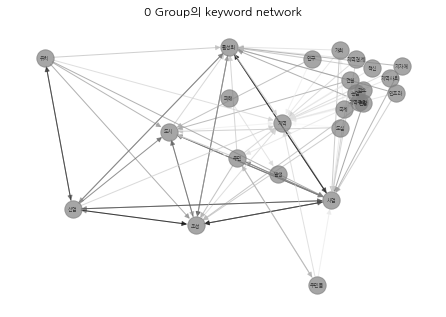

Group 2 START
70077
Keyword_set_prepared
itemset_built
# of single keyword set : 423
          lift
0.50  2.981245
0.70  3.626326
0.90  5.151796
0.99  7.200107


100%|██████████| 421/421 [00:00<00:00, 12465.78it/s]

Number of node : 23
Draw Net


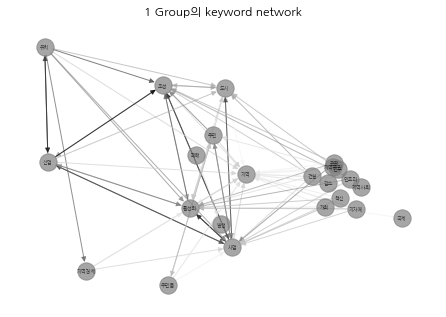

Group 3 START
86535
Keyword_set_prepared
itemset_built
# of single keyword set : 422
          lift
0.50  3.143922
0.70  3.760842
0.90  5.053094
0.99  7.420392


100%|██████████| 419/419 [00:00<00:00, 12714.70it/s]

Number of node : 23
Draw Net


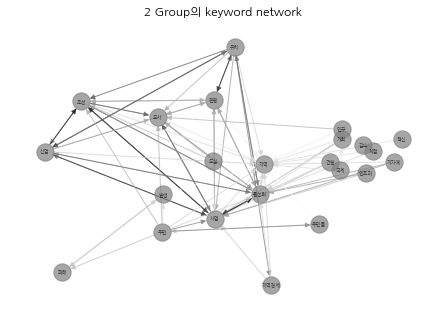

Group 4 START
106414
Keyword_set_prepared
itemset_built
# of single keyword set : 631
          lift
0.50  3.092075
0.70  3.738046
0.90  4.966328
0.99  7.095153


100%|██████████| 628/628 [00:00<00:00, 13101.79it/s]

Number of node : 26
Draw Net


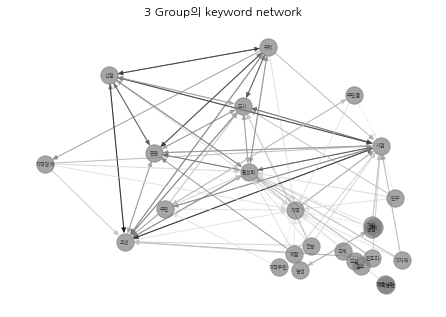

Group 5 START
51382
Keyword_set_prepared
itemset_built
# of single keyword set : 548
          lift
0.50  3.065796
0.70  3.773272
0.90  5.161035
0.99  7.399389


100%|██████████| 543/543 [00:00<00:00, 13070.12it/s]

Number of node : 27
Draw Net


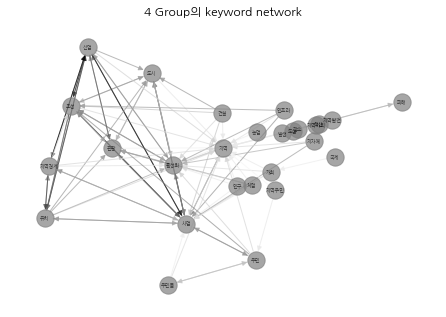

Group 6 START
103795
Keyword_set_prepared
itemset_built
# of single keyword set : 476
          lift
0.50  2.660152
0.70  3.278825
0.90  4.275870
0.99  6.431086


100%|██████████| 472/472 [00:00<00:00, 12901.43it/s]

Number of node : 27
Draw Net


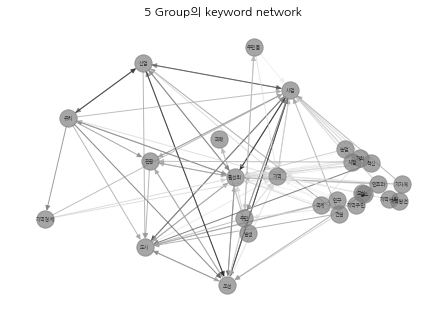

<Figure size 432x288 with 0 Axes>

In [10]:
for idx, TARGET_CITY in enumerate(TARGET_CITY_LIST):
    data_len_lst = []
    print(f"Group {idx +1} START")
    dataset = data_all[data_all['city'].apply(lambda x: is_in_group(x, TARGET_CITY))]
    #if dataset.shape[0] > 100000:
    #    dataset = dataset.sample(100000)
    dataset.reset_index(inplace=True, drop = True)
    data_len_lst.append(dataset.shape[0])   

    keyword_set = dataset['filter_keyword']
    key_set = []
    for item in keyword_set:
        item = str(item)
        item = item.replace('{', "")
        item = item.replace('}', "")
        item = item.replace("'", "")
        #item = stopword_pre.stopword(item)
        for stop in stop_lst:
            item = item.replace(stop + ',', "")
        splited = item.split(",")
        temp = []
        for tok in splited:                         
            temp.append(tok.replace(" ", ""))
        key_set.append(temp)
    print(len(key_set))
    # if len(key_set) <= 30:
    #     print("too small keyset")
    #     print(len(key_set))
    #     continue

    print("Keyword_set_prepared")


    #==================apriori=====================================
    #apriori
    from mlxtend.preprocessing import TransactionEncoder
    from mlxtend.frequent_patterns import apriori

    te = TransactionEncoder()
    te_result = te.fit(key_set).transform(key_set)
    key_df = pd.DataFrame(te_result, columns=te.columns_)

    itemset = apriori(key_df, min_support=0.01, use_colnames=True)
    print('itemset_built')
    from mlxtend.frequent_patterns import association_rules
    apriori_result = association_rules(itemset, metric="confidence", min_threshold=0.3)
    apriori_result.to_csv(f"../program_graph/group_total/apriori_G{idx + 1}.csv")

    idx_lst = []
    i = 0
    for a, b in zip(apriori_result['antecedents'], apriori_result['consequents']):
        #if len(a) == 1:
        #    if len(b) == 1:
        idx_lst.append(i)
        i += 1

    print(f"# of single keyword set : {len(idx_lst)}")
    apriori_single = apriori_result.iloc[idx_lst,:]
    
    #===============Draw Network=======================================
    network_data = apriori_single[['antecedents', 'consequents', 'lift']]
    #print(f"netword_data : {network_data.shape}")

    import matplotlib.pyplot as plt
    import networkx as nx

    thold = 1
    qtl = pd.DataFrame(network_data['lift']).quantile([0.5, 0.7, 0.9, 0.99])
    print(qtl)

    #===============Build graph===================================
    network_data = network_data[network_data['lift'] > thold]
    graph = nx.DiGraph()
    for i in tqdm(range(len(network_data))):
        a, b, c = network_data.iloc[i, :]
        a = list(a)
        b = list(b)
        a = a[0].replace(" ", "")
        b = b[0].replace(" ", "")
        #if a in keyword_list:
        #    graph.add_edge(a, b, weight = round(c,3))
        #if b in keyword_list:    
        graph.add_edge(a, b, weight = round(c,3))

    print(f"Number of node : {graph.number_of_nodes()}")

    key_match_lst = []
    i = 0
    for node in graph.nodes:
        if node in keyword_list:
            key_match_lst.append(node)
    print("Draw Net")
    #===========Check edges and weights=====================
    try:
        edges, weights = zip(*nx.get_edge_attributes(graph,'weight').items())
    except:
        print(f"It is empty graph")
    else:
        n_size = dict(graph.degree)
        pos = nx.kamada_kawai_layout(graph)
        nx.draw(graph, nodelist=n_size.keys(), 
                #node_size=[ (v*5) + 50 for v in n_size.values()],
                with_labels = True, font_family = font_name, font_size = 5,
                alpha = 0.7,
                pos = pos,
                node_color = 'grey',
                edgelist=edges, edge_color=weights, width=1, edge_cmap=plt.cm.binary)

        plt.title(f"{idx} Group의 keyword network")
        #plt.show(block=False)
        plt.show()
        plt.clf()